# Imports

In [2]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Reading data

In [5]:
file, meta = arff.loadarff('data/phpPrh7lv.arff')
data = pd.DataFrame(file)
data

,V1,V2,V3,V4,V5,V6,V7,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,b'1'
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,b'1'
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,b'1'
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,b'1'
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,b'1'
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,b'3'
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,b'3'
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,b'3'
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,b'3'


# Preprocessing

In [19]:
correlations = data.corr()
avg_correlation = correlations.abs().mean()
selected_attributes = avg_correlation.nsmallest(4).index
df_selected = data[selected_attributes]
print(f"\nSelected: \n{df_selected.head()}")

scaler = MinMaxScaler()
df_selected_normalized = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

print(f"\nNormalized: \n{df_selected_normalized.head()}")



Selected: 
      V6 Class      V3     V7
0  2.221  b'1'  0.8710  5.220
1  1.018  b'1'  0.8811  4.956
2  2.699  b'1'  0.9050  4.825
3  2.259  b'1'  0.8955  4.805
4  1.355  b'1'  0.9034  5.175

Normalized: 
         V6  Class        V3        V7
0  0.189302    0.0  0.570780  0.345150
1  0.032883    0.0  0.662432  0.215165
2  0.251453    0.0  0.879310  0.150665
3  0.194243    0.0  0.793103  0.140817
4  0.076701    0.0  0.864791  0.322994


# KNN Grouping

In [30]:
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
df_normalized.head()

kmeans_3 = KMeans(n_clusters=3, init='random', random_state=42, n_init=10)
data['Cluster_3'] = kmeans_3.fit_predict(df_normalized)
kmeans_4 = KMeans(n_clusters=4, init='random', random_state=42, n_init=10)
data['Cluster_4'] = kmeans_4.fit_predict(df_normalized)

cohesion_3 = silhouette_score(df_normalized, data['Cluster_3'])
separation_3 = silhouette_score(df_normalized, data['Cluster_3'], metric='euclidean', sample_size=len(data))
cohesion_4 = silhouette_score(df_normalized, data['Cluster_4'])
separation_4 = silhouette_score(df_normalized, data['Cluster_4'], metric='euclidean', sample_size=len(data))

print(f"Group 3:")
print(f"Cohesion:  {cohesion_3}")
print(f"Splitting:  {separation_3}")

print(f"\nGroup 4:")
print(f"Cohesion: {cohesion_4}")
print(f"Splitting: {separation_4}")


Group 3:
Cohesion:  0.4809790353552047
Splitting:  0.48097903535520486

Group 4:
Cohesion: 0.5353170138549783
Splitting: 0.5353170138549783


# Hierarchical Grouping


In [33]:
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(df_normalized)
linkage_matrix = linkage(df_normalized, 'ward') 
linkage_matrix

array([[1.48000000e+02, 1.98000000e+02, 1.93504972e-01, 2.00000000e+00],
       [1.30000000e+01, 1.40000000e+01, 2.10838343e-01, 2.00000000e+00],
       [1.49000000e+02, 1.74000000e+02, 2.12567098e-01, 2.00000000e+00],
       [1.23000000e+02, 1.30000000e+02, 2.19082597e-01, 2.00000000e+00],
       [4.00000000e+01, 4.10000000e+01, 2.39904413e-01, 2.00000000e+00],
       [1.10000000e+01, 4.50000000e+01, 2.58887422e-01, 2.00000000e+00],
       [1.73000000e+02, 1.76000000e+02, 2.71067313e-01, 2.00000000e+00],
       [4.90000000e+01, 5.50000000e+01, 2.86861619e-01, 2.00000000e+00],
       [5.00000000e+00, 7.00000000e+00, 2.90557562e-01, 2.00000000e+00],
       [1.01000000e+02, 1.27000000e+02, 2.91245011e-01, 2.00000000e+00],
       [1.47000000e+02, 1.94000000e+02, 2.96325619e-01, 2.00000000e+00],
       [7.10000000e+01, 7.50000000e+01, 3.18522663e-01, 2.00000000e+00],
       [1.07000000e+02, 1.36000000e+02, 3.34441266e-01, 2.00000000e+00],
       [1.91000000e+02, 2.06000000e+02, 3.36662931e

## Plotting

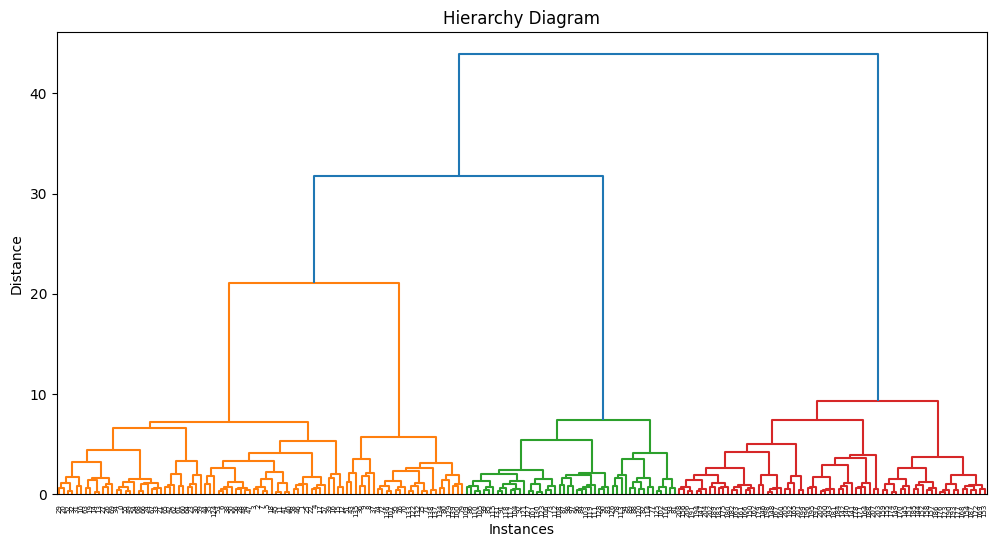

In [40]:

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchy Diagram')
plt.xlabel('Instances')
plt.ylabel('Distance')
plt.show()

# Grouping by density

In [48]:
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
df_normalized.head()

eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        data['DBSCAN_Clusters'] = dbscan.fit_predict(df_normalized)

        unique_clusters = set(data['DBSCAN_Clusters'])
        if len(unique_clusters) <= 1 or (len(unique_clusters) == 2 and -1 in unique_clusters):
            print(f"\nParameters: eps={eps}, min_samples={min_samples}")
            print(f"\nOnly one cluster or all points are considered noise.")
        else:
            silhouette_avg = silhouette_score(df_normalized, data['DBSCAN_Clusters'])
            print(f"\nParameters: eps={eps}, min_samples={min_samples}")
            print(f"Estimated number of clusters: {len(unique_clusters)}")
            print(f"Number of noise points: {list(data['DBSCAN_Clusters']).count(-1)}")
            print(f"Silhouette Score: {silhouette_avg}")


Parameters: eps=0.5, min_samples=5

Only one cluster or all points are considered noise.

Parameters: eps=0.5, min_samples=10

Only one cluster or all points are considered noise.

Parameters: eps=0.5, min_samples=15

Only one cluster or all points are considered noise.

Parameters: eps=1.0, min_samples=5
Estimated number of clusters: 5
Number of noise points: 25
Silhouette Score: 0.49563693086355853

Parameters: eps=1.0, min_samples=10
Estimated number of clusters: 5
Number of noise points: 50
Silhouette Score: 0.38076393989626633

Parameters: eps=1.0, min_samples=15
Estimated number of clusters: 4
Number of noise points: 91
Silhouette Score: 0.21856525245915917

Parameters: eps=1.5, min_samples=5
Estimated number of clusters: 5
Number of noise points: 20
Silhouette Score: 0.5153306298863212

Parameters: eps=1.5, min_samples=10
Estimated number of clusters: 5
Number of noise points: 22
Silhouette Score: 0.5086491285228085

Parameters: eps=1.5, min_samples=15
Estimated number of clust